# __Ensemble Learning__

- Categories in ensemble learning
    * Sequential ensemble technique
    * Parallel ensemble technique
- Simple techniques used in ensemble learning
    * __Voting__
        * Hard Voting
        * Soft Voting
    * Averaging
    * Weighted Averaging
- Advanced techniques used in ensemble learning
    * __Bagging (bootstrap aggregating)__
        * Bagging Techniques
        * Advantages of bagging
        * Disadvantages of bagging
        * Out-of-bag (OOB) concept
    * __Boosting__
        * Boosting Techniques
        * Advantages of boosting
        * Disadvantages of boosting
    * __Stacking__
        * Advantages of stacking
        * Disadvantages of stacking


## __1. Introduction to Ensemble Learning__

Ensemble learning combines multiple models to enhance the overall performance of machine learning algorithms. The fundamental principle of ensemble learning is combining predictions from multiple individual models to produce a more accurate and robust prediction than any single model.

### __Goals of Ensemble Learning__


- Enhance predictive accuracy by combining multiple models.
- Improve model robustness and generalization performance.

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/ensemble_learning.png" width=500 height=500 />

__Example:__ Imagine you are deciding whether to go outside based on weather predictions. Instead of relying on just one weather forecast, you check multiple sources, like the weather app, a meteorologist's report, and a weather website. You then combine these predictions to make your decision.

This process mirrors ensemble learning, where combining multiple models (or weather forecasts) results in a more accurate prediction (or decision) than any single model could offer.

### __Importance of Ensemble Learning__

- Improves prediction accuracy by combining diverse models
- Enhances model resilience and robustness against uncertainties
- Mitigates biases and errors present in individual models
- Captures a wide range of perspectives to achieve better performance
- Provides reliable and robust forecasts across various domains, ensuring more dependable outcomes

 ### __Weak and Strong learners in Ensemble Learning__


- A **Weak learner** (WL) or **Base learner** is a learning algorithm
capable of producing classifiers with probability of error strictly (but only slightly) less than that of random guessing (0.5, in the case of binary)

- On the other hand, **Strong learner** (SL) is able (given enough training data) to yield classifiers with arbitrarily small error probability. It performs much better than random guessing.
  
An ensemble (or committee) of classifiers is a classifier build upon some
combination of Weak learner. The strategy of boosting, and ensembles of classifiers, is to learn many weak classifiers and combine them, instead of trying to learn a single Strong learner.

## __2. Categories in Ensemble Learning__

Ensemble learning can be broadly classified into two categories:
- Sequential ensemble technique
- Parallel ensemble technique

### __1. Sequential Ensemble Technique__

These techniques train models sequentially, with each model attempting to correct its predecessor's errors. This technique focuses on improving the overall performance of the ensemble by iteratively refining predictions. An example of this approach is boosting.

__Note:__ It typically employs weak learners as base estimators because these learners initially have higher error rates.

The steps involved in the sequential ensemble technique depend on the data structure and the requirements of the application. They are:
1. __Base Model Selection__: Choose the initial model.
2. __Sequential Training__: Train models one after the other.
3. __Error Correction__: Each model learns from previous mistakes.
4. __Prediction Refinement__: Iteratively refine predictions.
5. __Combining Predictions__: Combine predictions from all models.
6. __Evaluation__: Assess ensemble performance using metrics.


<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Sequential_Ensemble_Technique.png" width=1000 height=1000 />


__Note:__ If all four base models are of the same type, it is considered to be a homogeneous ensemble. If they are different, it is considered heterogeneous.

- The diagram above shows the training data divided into four samples, with each sample trained on a distinct base model.
- Insights gained from model M1 are passed to model M2 alongside sample S2.
- M2 then adjusts its weights and biases based on the outcomes of M1.
- This process repeats for models 2, 3, and 4.
- Finally, all the learners are combined using a weighted averaging strategy.

The summation sign ($ ∑ $) indicates the function that adjusts the model to improve its overall performance.

#### __The sequential ensemble technique is employed when dealing with:__

- Complex relationships between input features and the target variable.
- Diverse data types, including numerical and categorical data.
- Imbalanced datasets, where skewed class distributions pose classification challenges.
- Incremental updates are needed to adapt models gradually to evolving data over time.

### __2. Parallel Ensemble Technique__

The parallel ensemble technique concurrently trains models. They combine the predictions from multiple models to improve the final output. Bagging and Random Forest algorithms are examples of parallel ensemble techniques.

__Note:__  It employs stronger learners as base estimators.

The steps involved in the parallel ensemble technique are:

1. __Data Partitioning__: Divide the dataset into subsets
2. __Model Training__: Train models concurrently on subsets
3. __Prediction__: Models make independent predictions
4. __Combining Predictions__: Aggregate predictions using techniques like voting or averaging
5. __Evaluation__: Assess ensemble performance using metrics


<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Parallel_Ensemble_Technique.png" width=1000 height=1000 />


- In the above diagram, the training data is divided into four samples, labeled S1 to S4, each trained on a distinct base model (M1 to M4).
- Unlike the sequential ensemble technique, the data in the base learners is independent.
- This independence of base learners significantly reduces the error due to the application of averages.

The summation sign ($ ∑ $) indicates the aggregated model with improved performance, which has been learned from all independent base models, M1 to M4.

#### __The parallel ensemble technique is used to:__

- Enhance scalability, allowing for the efficient processing of large volumes of data by distributing the workload.
- Expedite training and prediction processes through parallel computation on multi-core systems.
- Reduce susceptibility to noise and overfitting by averaging out individual model errors.
- Capture diverse data patterns effectively by utilizing different models trained on varied data subsets.

## __3. Simple Techniques used in Ensemble Learning__

* Voting
* Averaging
* Weighted Averaging

### __1. Voting__

Voting is one of the fundamental methods of ensemble learning. It involves aggregating the predictions from multiple models to arrive at a final prediction.
Two common types of voting in ensemble learning are:

* Majority voting/Hard voting
* Weighted voting/Soft voting.

#### __1. Majority Voting/Hard Voting__

Majority Voting or Hard Voting is an ensemble learning classification technique. It involves multiple models, making predictions for each data point. Each model's prediction is considered a __vote__. The final prediction is determined by the majority vote among the models.

__Example:__
    
- Majority Voting ensemble works on breast cancer classification by combining predictions from multiple individual classifiers, such as Logistic Regression, Decision Tree, and Support Vector Machine.
- Each classifier provides its prediction for whether a given sample belongs to a certain class. The voting ensemble then aggregates these predictions using a voting mechanism.
- The final prediction is determined based on the most commonly predicted class among all classifiers.
- This approach leverages the collective wisdom of diverse models to improve overall prediction accuracy and robustness in breast cancer classification tasks.    

#### __Let's look at an implementation of majority voting using a breast cancer classification dataset.__

In [200]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

In [3]:
# Load the dataset from the specified URL and assign column names to the DataFrame
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

In [5]:
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
data.describe()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [16]:
# Checking for `?` in columns
data.isin(['?']).sum()

Sample code                     0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


##### __Observation:__

1. `Bare Nuclei` has 16 missing values (containing `?`) and has `object` Dtype.

In [20]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [22]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [26]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [28]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [30]:
data['Class'].value_counts()

Class
0    458
1    241
Name: count, dtype: int64

##### __Observation:__

The dataset is imbalanced, need to balance it using `SMOTE`.

In [37]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [45]:
# Extract features (X) and target variable (y)

X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column as the target variable

In [47]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [49]:
# Create an instance of SimpleImputer to fill in missing values with the median

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [51]:
# Create an instance of MinMaxScaler to scale features to a range of (0, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize list for base models
estimators = [
    ('logistic', LogisticRegression()),
    ('cart', DecisionTreeClassifier()),
    ('svm', SVC())
]

In [59]:
# Create Voting Classifier ensemble with estimators
ensemble = VotingClassifier(estimators, voting="hard")

# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# Evaluate ensemble model using cross-validation
results = cross_val_score(ensemble, X_train_scaled, y_train, cv=kfold)

# Print accuracy scores of the ensemble model
print(f"Mean cross-validation accuracy of the ensemble model: {results} \n")

# Print mean accuracy score of the ensemble model
print(f"Mean cross-validation accuracy of the ensemble model: {results.mean():.2f}")

# Fit the ensemble on the scaled training set and evaluate on the scaled test set
ensemble.fit(X_train_scaled, y_train)

train_accuracy = ensemble.score(X_train_scaled, y_train)
test_accuracy = ensemble.score(X_test_scaled, y_test)

# Print train and test accuracy
print(f"Train accuracy of the ensemble model: {train_accuracy:.2f}")
print(f"Test accuracy of the ensemble model: {test_accuracy:.2f}")

Mean cross-validation accuracy of the ensemble model: [0.96428571 0.98214286 0.91071429 0.98214286 0.96428571 0.98214286
 1.         0.92857143 0.94642857 0.98181818] 

Mean cross-validation accuracy of the ensemble model: 0.96
Train accuracy of the ensemble model: 0.98
Test accuracy of the ensemble model: 0.96


##### __Observation:__

The majority voting ensemble's 96% accuracy rate demonstrates its remarkable effectiveness in predicting breast cancer classifications. By combining predictions from multiple individual classifiers, this ensemble leverages the collective insights of diverse models to achieve highly accurate results.

#### __Let us explore other performance evaluation metrics as well:__

In [76]:
# evaluating model on test dataset

y_pred_test_ensemble = ensemble.predict(X_test_scaled)

print('Hard Voting Classification report: \n')
print(classification_report(y_test,y_pred_test_ensemble))

Hard Voting Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        91
           1       0.94      0.94      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



Confusion matrix:
[[88  3]
 [ 3 46]]


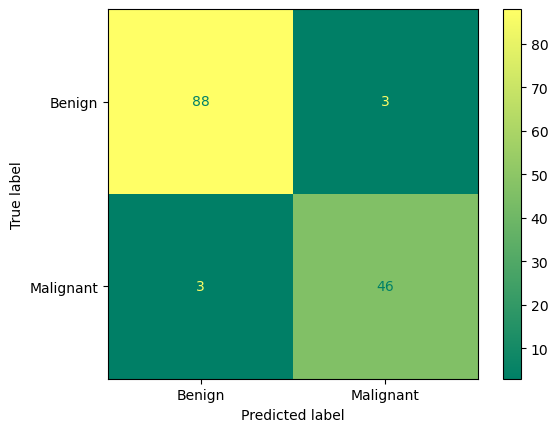

In [78]:
print('Confusion matrix:')

cm_ensemble = confusion_matrix(y_test,y_pred_test_ensemble)
print(cm_ensemble)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=['Benign','Malignant'])
disp.plot(cmap="summer")
plt.show()


#### __2. Weighted Voting/Soft Voting__

Soft voting takes into account the probability estimates for each class provided by the models, assuming the models are capable of estimating these probabilities (i.e., they have a predict_proba method). The final prediction is determined by averaging these probabilities across all models, and the class with the highest average probability is selected.

### __Implementation of Hard and Soft Voting for comparison__

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [82]:
# Load the Wisconsin Breast Cancer dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
data = pd.read_csv(url, header=None, na_values='?')
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

In [83]:
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [86]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [88]:
# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

# Convert object type column to numeric
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [90]:
# Features and target
# `Sample code`(0th column) is exempted when creating X

X = data.iloc[:, 1:-1]
y = data['Class']

In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#### __Create Pipeline:__

- `make_pipeline`: Construct a Pipeline from the given estimators.

In [95]:
# Imputation to handle missing values
imputer = SimpleImputer(strategy='median')

# Define the base models with standard scaling and imputation
model1 = make_pipeline(imputer, StandardScaler(), LogisticRegression(random_state=1, max_iter=10000))
model2 = make_pipeline(imputer, StandardScaler(), DecisionTreeClassifier(random_state=1))
model3 = make_pipeline(imputer, StandardScaler(), SVC(probability=True, random_state=1))

# Define k-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [97]:
# Create an ensemble of models for hard voting
hard_voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3)],
    voting='hard'
)

# Cross-validation on the training data
hard_cv_scores = cross_val_score(hard_voting_classifier, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Hard Voting - Mean CV Accuracy: {hard_cv_scores.mean():.4f}\n")

# Fit and evaluate on the test data
hard_voting_classifier.fit(X_train, y_train)
y_pred_hard = hard_voting_classifier.predict(X_test)
hard_test_accuracy = hard_voting_classifier.score(X_test, y_test)
print(f"Hard Voting - Test Accuracy: {hard_test_accuracy:.4f}\n")

# Additional evaluation metrics for hard voting classifier
print("Hard Voting - Classification Report \n")
print(classification_report(y_test, y_pred_hard))

print("Hard Voting - Confusion Matrix:- \n")
print(confusion_matrix(y_test, y_pred_hard))


Hard Voting - Mean CV Accuracy: 0.9659

Hard Voting - Test Accuracy: 0.9643

Hard Voting - Classification Report 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Hard Voting - Confusion Matrix:- 

[[88  3]
 [ 2 47]]


In [99]:
# Create and evaluate a soft voting classifier
soft_voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3)],
    voting='soft'
)

# Cross-validation on the training data
soft_cv_scores = cross_val_score(soft_voting_classifier, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Soft Voting - Mean CV Accuracy: {soft_cv_scores.mean():.4f} \n")

# Fit and evaluate on the test data
soft_voting_classifier.fit(X_train, y_train)
y_pred_soft = soft_voting_classifier.predict(X_test)
soft_test_accuracy = soft_voting_classifier.score(X_test, y_test)
print(f"Soft Voting - Test Accuracy: {soft_test_accuracy:.4f} \n")

# Additional evaluation metrics for soft voting classifier
print("Soft Voting - Classification Report:- \n")
print(classification_report(y_test, y_pred_soft))

print("Soft Voting - Confusion Matrix \n")
print(confusion_matrix(y_test, y_pred_soft))

Soft Voting - Mean CV Accuracy: 0.9624 

Soft Voting - Test Accuracy: 0.9643 

Soft Voting - Classification Report:- 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Soft Voting - Confusion Matrix 

[[88  3]
 [ 2 47]]


### __2. Averaging__

The averaging technique is used mainly for regression problems. In this method, the predictions of multiple models are averaged to obtain the final prediction. This technique helps reduce variance and produces a more stable prediction.

__Example:__

- Averaging ensemble works by combining the predictions from multiple classifiers trained on the dataset.
- These classifiers, such as Logistic Regression, Decision Tree, and Support Vector Machine, provide individual predictions for each data point.
- Then it takes the average of these predictions to form a final prediction.
- This approach helps to mitigate biases and uncertainties inherent in individual models, leading to a more accurate prediction of breast cancer classifications.

**Note:** X and y from the previous dataset is  used for the implementation

In [104]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [108]:
# Initialize classifiers
LogReg_clf = LogisticRegression()
Dtree_clf = DecisionTreeClassifier()
svc_clf = SVC(probability=True)  # Enable probability for SVC

In [110]:
# Train classifiers on the training dataset
LogReg_clf.fit(X_train_scaled, y_train)
Dtree_clf.fit(X_train_scaled, y_train)
svc_clf.fit(X_train_scaled, y_train)

# Generate probability predictions for the positive class from each classifier on the test set
LogReg_prob = LogReg_clf.predict_proba(X_test_scaled)[:, 1]
Dtree_prob = Dtree_clf.predict_proba(X_test_scaled)[:, 1]
svc_prob = svc_clf.predict_proba(X_test_scaled)[:, 1]

In [116]:
# Average the probability predictions
avg_probs = np.mean([LogReg_prob, Dtree_prob, svc_prob], axis=0)
print("Average probabilities for Logistic, Decision tree and SVM: ", avg_probs[:5])

# Convert averaged probabilities to class predictions based on a threshold
avg_preds = (avg_probs > 0.5).astype(int)

# Evaluate the accuracy of the averaged predictions on the test set
accuracy = accuracy_score(y_test, avg_preds)

# Print the accuracy
print("\nAccuracy of averaged model predictions on test data:", accuracy)

Average probabilities for Logistic, Decision tree and SVM:  [0.00356877 0.00871105 0.00795327 0.92700632 0.00601257]

Accuracy of averaged model predictions on test data: 0.9571428571428572


##### __Observation:__

The averaging ensemble achieves an accuracy of 95%, slightly lower than the max voting ensemble. However, this accuracy rate still underscores the effectiveness of the averaging ensemble in breast cancer classification.

### __3. Weighted Averaging__

Weighted averaging assigns different weights to each model’s prediction, reflecting its importance or reliability. The final prediction is a weighted average, which can be more effective than simple averaging because it considers each model's performance.

__Example:__

- In medical diagnosis, weighted ensemble learning combines results from various diagnostic tests with different reliabilities.
- Each test's result is weighted based on its importance. For instance, blood tests, imaging scans, and physical examinations' results are combined to determine a patient's diagnosis accurately and reliably.

By weighting and averaging results from multiple diagnostic tests, you can determine the final diagnosis, thereby enhancing diagnostic accuracy and reliability. This highlights the significance of weighted averaging for improving decision-making.

## __4. Advanced Techniques for Ensemble Learning__

These techniques use complex methods to merge predictions from many individual models. It aims for better predictive accuracy. They are employed for complex problems where high predictive accuracy is crucial, such as in financial forecasting, medical diagnosis, and natural language processing applications.

### __1. Bagging__

Bagging or Bootstrap Aggregating enhances the stability and accuracy of machine learning algorithms. This method creates multiple subsets from the original dataset, known as bootstrap samples, by selecting data points with replacement. Each subset trains a separate model.

For final predictions, Bagging combines the individual models' outputs by using voting (for classification tasks) or averaging (for regression tasks). This approach effectively reduces variance and helps prevent overfitting.

__Note:__ Random Forest is a popular algorithm that utilizes bagging by training multiple decision trees on different bootstrap samples and combining their predictions.

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Bagging.png" width=700 height=700 />

__Note:__ The numbering shown in the above image outlines the specific workflow for bagging.

#### __Let's look at an implementation of bagging classifier using a Pima Indians Diabetes classification dataset.__

In [163]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [165]:
# Load the Pima Indians Diabetes dataset using the given URL and assign the names

url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Check the head of the data using the head() method
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### __Create a feature matrix X and a target vector y__

In [256]:
# Assign all the rows up to the 8th column of the data to X
X = data.iloc[:,0:8].values

# Assign the 9th column of the same data to Y
y = data["class"].values

In [258]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [262]:
# Set up the k-fold cross-validation with n_splits to 10
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Create a decision tree classifier named cart
cart = DecisionTreeClassifier()

# The estimator will be set to 100, which is equal to the number of trees
num_trees = 100

#### __Apply the bagging technique on the dataset__

* `oob_score`: This is a method of measuring the prediction error of random forests, bagging, and other ensemble methods that involve bootstrap aggregating.


In [265]:
# Create a bagging classifier with the decision tree classifier (cart) as the base estimator
# Ensure oob_score is enabled
bagging_model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=12, oob_score=True)

# Perform cross-validation using the model, feature matrix (X), target vector (y), and specified number of folds (cv)
results = model_selection.cross_val_score(bagging_model, X_train_scaled, y_train, cv=kfold)

# Print the cross-validation results
print(results)

[0.79032258 0.67741935 0.75806452 0.70967742 0.86885246 0.78688525
 0.63934426 0.7704918  0.73770492 0.72131148]


__Observations:__
- The results array contains the cross-validation scores for each fold of the data.
- The cross-validation scores indicate the performance of the BaggingClassifier model on different subsets of the data.
- These scores can assess the generalization ability and performance stability of the BaggingClassifier model across multiple iterations of the training data.

In [268]:
# Calculate the Mean Cross-Validation Score using .mean() function
mean_score = np.mean(results)

print("Mean Cross-Validation Score (Bagging Classifier):", mean_score)

Mean Cross-Validation Score (Bagging Classifier): 0.7460074034902168


__Observations:__

- The provided code illustrates a bagging implementation with a DecisionTreeClassifier base estimator. It employs KFold cross-validation with 10 folds and applies BaggingClassifier with 100 decision tree estimators to each fold.
- The resultant mean cross-validation score of 0.75 demonstrates the ensemble's effectiveness in enhancing predictive performance compared to a single decision tree classifier.

In [271]:
# fitting  and evaluating Bagging classifier model in training and test dataset

bagging_model.fit(X_train_scaled,y_train)

# evaluating model on train and test dataset
y_pred_train_bagging = bagging_model.predict(X_train_scaled)
y_pred_test_bagging = bagging_model.predict(X_test_scaled)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_bagging)
testing_accuracy = accuracy_score(y_test, y_pred_test_bagging)
print("\nBagging Classifier:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}\n")


Bagging Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.7337662337662337



In [272]:
# Find OOB score for Bagging classifier
bagging_model.oob_score_

0.7638436482084691

In [275]:
print('# Classification report')
print(classification_report(y_test,y_pred_test_bagging))

# Classification report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



# Confusion matrix


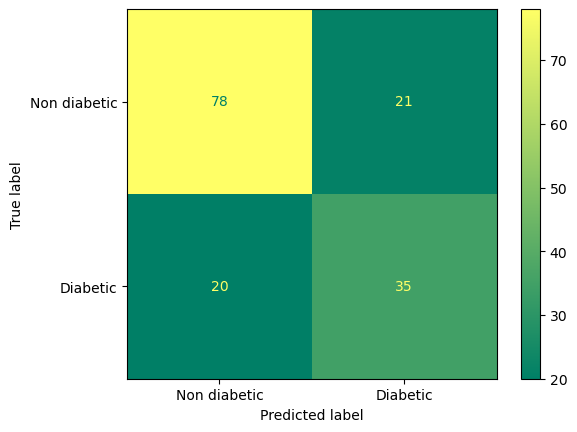

In [277]:
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Non diabetic','Diabetic']
cm = confusion_matrix(y_test,y_pred_test_bagging)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

#### __Advantages of Bagging__

- It reduces the risk of overfitting by training on various subsets of the data.
- It improves the model's accuracy and stability.
- It works well with complex models that tend to overfit.

#### __Disadvantages of Bagging__

- It increases computational complexity because it requires training multiple models.
- It may not significantly improve performance if the base models are already biased.

#### __Difference between Bagging classifier and Random Forest__

- Bagging classifier takes all features
- Bagging classifier can take any model as the base estimator like svm, logistic regression, etc, where as RF can take only decision trees.

#### __Apply the Random Forest on the dataset__

In [283]:
from sklearn.ensemble import RandomForestClassifier

In [291]:
rfc_clf = RandomForestClassifier(n_estimators=num_trees+100, random_state=12, oob_score=True)

rfc_clf.fit(X_train_scaled, y_train)

# evaluating model on train and test dataset
y_pred_train_rfc = rfc_clf.predict(X_train_scaled)
y_pred_test_rfc = rfc_clf.predict(X_test_scaled)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_rfc)
testing_accuracy = accuracy_score(y_test, y_pred_test_rfc)
print("\nRandom Forest:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}\n")


Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.7402597402597403



In [293]:
# Set up the k-fold cross-validation with n_splits to 10
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Perform cross-validation using the model, feature matrix (X), target vector (y), and specified number of folds (cv)
results = model_selection.cross_val_score(rfc_clf, X_train_scaled, y_train, cv=kfold)

print("Mean Cross-Validation Score (Random Forest):", mean_score)

Mean Cross-Validation Score (Random Forest): 0.7460074034902168


In [295]:
# Find OOB score for RFC
rfc_clf.oob_score_

0.7638436482084691

### __2.  Out-Of-Bag (OOB) Concept__

In bagging, __out-of-bag (OOB)__ data refers to instances not included in the bootstrap sample for training a specific base model. Since the process trains each model on a random subset of the original data, it naturally leaves out some instances.

These OOB instances serve as a built-in validation set for each model, allowing for an assessment of the model's performance on unseen data points. You can compute the OOB error, which offers an efficient way to evaluate the model's generalization ability.

This method eliminates the need for additional validation data or cross-validation procedures.

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Out_Of_Bag_Concept.png" width=700 height=700 />

In the above image, Sample 1 lacks Rat and Cow, whereas Sample 3 includes all animals from the primary training set. Data points were randomly chosen with replacement during sample creation, and those omitted from a particular sample are identified as out-of-bag (OOB) points.

 - The `OOB score` is an estimate of performance that mimics cross-validation. It uses out-of-bag samples to estimate the model's accuracy.

 - This means that for each tree in a bagging ensemble, only the data not seen by the tree (out-of-bag data) are used to assess that tree’s performance.

##### __OOB Error for Bagging Classifier__

In [308]:
# Perform cross-validation and compute OOB error for 
oob_error_bg = 1 - bagging_model.fit(X_train_scaled, y_train).oob_score_

print("Out-of-Bag Error (Bagging Classifier):", oob_error_bg)

Out-of-Bag Error (Bagging Classifier): 0.23615635179153094


##### __OOB Error for Random Forest__

In [310]:
# Perform cross-validation and compute OOB error for 
oob_error_rfc = 1 - rfc_clf.fit(X_train_scaled, y_train).oob_score_

print("Out-of-Bag Error (Random Forest):", oob_error_rfc)

Out-of-Bag Error (Random Forest): 0.23615635179153094


__Observations:__
- The code computes the out-of-bag (OOB) error for a BaggingClassifier model using cross-validation.
- It calculates the OOB error by subtracting the OOB score from 1.
- The **OOB score** represents the model's accuracy on out-of-bag samples.
- The OOB error provides insight into the model's performance on unseen data points, indicating the misclassification rate of the model.

### __3. Boosting__

Boosting is a sequential ensemble technique where each model corrects its predecessor's mistakes. The main idea is to train models sequentially, each trying to correct the errors of the previous model.

The final prediction is a weighted sum of all the models' predictions. Boosting significantly reduces bias and variance, leading to more accurate models.

__Note:__ Popular boosting algorithms include AdaBoost, Gradient Boosting Machines (GBM), and XGBoost.


<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Boosting.png" width=700 height=700 />

__Note:__ The numbering shown in the above image specifically outlines the workflow for boosting.

### __Boosting Techniques__

There are various meta-algorithms in boosting that differentiate how the base models are aggregated, such as:
* Adaboost
* Gradient Boost
* XGBoost
* CatBoost

**Meta-algorithm** (or meta-learning) involves learning algorithms that are designed to learn how to combine the predictions of multiple machine learning models, often referred to as base models or learners, to improve overall performance

### __1. AdaBoost Algorithm__

AdaBoost, an abbreviation for __adaptive boosting__, stands as one of the leading boosting algorithms with widespread adoption. It focuses on classification problems, aiming to transform a collection of weak classifiers into a single strong classifier. It increases the weights of misclassified instances, directing subsequent classifiers to pay more attention to challenging cases.

**The AdaBoost algorithm follows these steps:**
1. Initially, the algorithm assigns equal weights to all observations in the dataset.
2. A model is constructed using a subset of the data.
3. Predictions are made on the entire dataset using this model.
4. The algorithm computes errors by comparing these predictions to the actual values.
5. In the subsequent model creation, the algorithm assigns higher weights to incorrectly predicted data points.
6. Weights are determined based on error values, where higher errors result in heavier observation weights.
7. This iterative process continues until the error function stabilizes or the algorithm reaches the maximum limit of estimators.



#### **Implementation of Adaboost Classifier using a breast cancer classification dataset**

In [398]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [335]:
# Load the dataset from the given URL and assign column names
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [336]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [338]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [341]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

- A SimpleImputer handles missing values in a dataset by imputing (i.e., filling in) the missing values with a specified statistic, such as the mean, median, or most frequent value of the respective feature.
- This is important because missing values can disrupt the analysis and modeling process, leading to biased results or errors in predictive models.
- Imputation helps maintain the integrity and completeness of the dataset, ensuring that the analysis or modeling algorithms can effectively utilize the available data for accurate insights or predictions.

In [344]:
# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [348]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [364]:
# Define K-fold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Create a pipeline for AdaBoost classifier with Decision Tree base estimator
adaboost_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', AdaBoostClassifier(n_estimators=70, random_state=7, algorithm='SAMME'))
])

# Evaluate the Adaboost Classifier pipeline using cross-validation on the training set
adaboost_results = cross_val_score(adaboost_pipeline, X_train, y_train, cv=kfold)
print("AdaBoost Classifier mean accuracy: ", adaboost_results.mean())

# Fit the Adaboost Classifier pipeline on the training set and evaluate on the test set
adaboost_pipeline.fit(X_train, y_train)

# evaluating model on train and test dataset
y_pred_train_adaboost = adaboost_pipeline.predict(X_train)
y_pred_test_adaboost = adaboost_pipeline.predict(X_test)

adaboost_train_score = adaboost_pipeline.score(X_train, y_train)
adaboost_test_score = adaboost_pipeline.score(X_test, y_test)
print("\nAdaboost Classifier train accuracy: ", adaboost_train_score)
print("Adaboost Classifier test accuracy: ", adaboost_test_score)


AdaBoost Classifier mean accuracy:  0.9534740259740259

Adaboost Classifier train accuracy:  0.9731663685152058
Adaboost Classifier test accuracy:  0.9571428571428572


Classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      0.92      0.94        49

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140


Confusion matrix


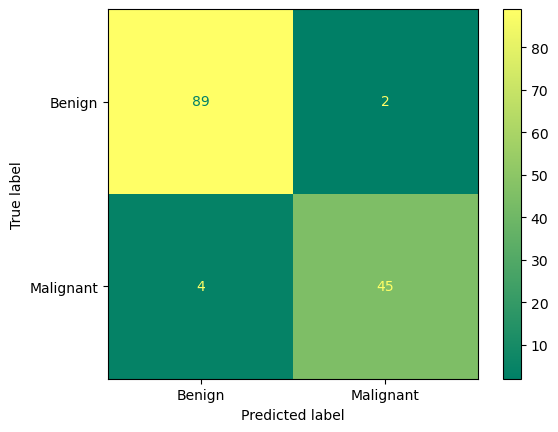

In [366]:
print('Classification report')
print(classification_report(y_test,y_pred_test_adaboost))

print('\nConfusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred_test_adaboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

__Observations:__

- This demonstrates the importance and effectiveness of AdaBoost in enhancing the predictive capability of weak learners, like decision trees.

#### **Implementation of Adaboost Classifier using a Pima Indians Diabetes classification dataset**

In [375]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [377]:
# Load the Pima Indians Diabetes dataset using the given URL and assign the names

url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Check the head of the data using the head() method
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [379]:
data.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [383]:
X = data.drop(columns=['class'])
y = data['class']

In [387]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [389]:
# Define K-fold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Create a pipeline for AdaBoost classifier with Decision Tree base estimator
adaboost_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', AdaBoostClassifier(n_estimators=70, random_state=7, algorithm='SAMME'))
])

# Evaluate the Adaboost Classifier pipeline using cross-validation on the training set
adaboost_results = cross_val_score(adaboost_pipeline, X_train, y_train, cv=kfold)
print("AdaBoost Classifier mean accuracy: ", adaboost_results.mean())

# Fit the Adaboost Classifier pipeline on the training set and evaluate on the test set
adaboost_pipeline.fit(X_train, y_train)

# evaluating model on train and test dataset
y_pred_train_adaboost = adaboost_pipeline.predict(X_train)
y_pred_test_adaboost = adaboost_pipeline.predict(X_test)

adaboost_train_score = adaboost_pipeline.score(X_train, y_train)
adaboost_test_score = adaboost_pipeline.score(X_test, y_test)
print("\nAdaboost Classifier train accuracy: ", adaboost_train_score)
print("Adaboost Classifier test accuracy: ", adaboost_test_score)


AdaBoost Classifier mean accuracy:  0.7363299841353781

Adaboost Classifier train accuracy:  0.7980456026058632
Adaboost Classifier test accuracy:  0.7857142857142857


Classification report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        97
           1       0.74      0.65      0.69        57

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154


Confusion matrix


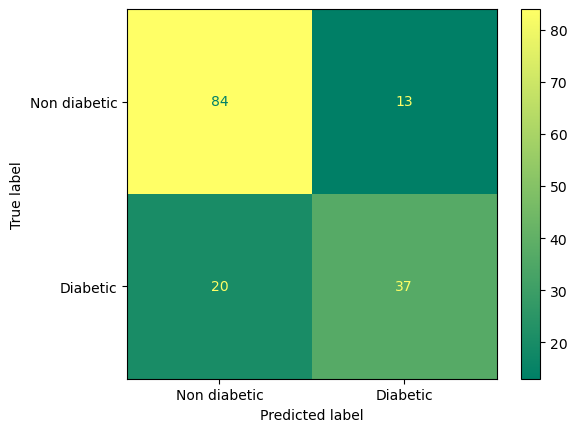

In [393]:
print('Classification report')
print(classification_report(y_test,y_pred_test_adaboost))

print('\nConfusion matrix')
cmap = 'summer'
display_labels=['Non diabetic','Diabetic']
cm = confusion_matrix(y_test,y_pred_test_adaboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

### __2. Gradient Boosting Machine__






Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models

**Gradient Boosting involves three main components:**

* Loss Function: The choice of loss function depends on the type of problem being solved (e.g., regression, classification). The goal is to find a model that minimizes the loss function.

* Weak Learners: Gradient Boosting uses decision trees as the default weak learner. These trees are usually of a fixed size and depth and are created one at a time.

* Additive Model: Instead of adjusting the weights of data points like AdaBoost, Gradient Boosting fits new models to the residual errors made by previous models. Essentially, each new model is built on the errors of the whole ensemble so far.

#### __4.2.4. XGBoost__

XGBoost, or eXtreme Gradient Boosting, stands out as a premier machine learning framework, widely adopted for its proficiency in supervised learning tasks including classification, regression, and ranking. This advanced algorithm builds upon the principles of gradient boosting and is celebrated for its exceptional accuracy and scalability in handling complex predictive modeling challenges.

 **XGBoost offers many essential features that make it ideal for classification tasks. Some of the reasons include:**

* High performance: As mentioned above, XGBoost is optimized for speed and efficiency, making it appropriate for large datasets and real-time applications.

* Regularization methods: L1 (Lasso) and L2 (Ridge) regularisation terms are included in XGBoost to avoid overfitting and increase generalization.

* Handle missing data: Moreover, XGBoost can handle missing data automatically, minimizing the need for preprocessing and imputation.




#### __4.2.5. CatBoost__

Catboost is a variant of gradient boosting that can handle both categorical and numerical features. It does not require any feature encodings techniques like One-Hot Encoder or Label Encoder to convert categorical features into numerical features.

### **Implementation of XGBoost, Gradient Boost and CatBoost Algorithm:**

In [ ]:
!pip install catboost

In [ ]:
# Import necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Load the dataset from the given URL and assign column names
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [ ]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [ ]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [ ]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [ ]:
# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Define K-fold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)


In [ ]:
# Gradient Boosting Classifier
gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=7))
])

# Evaluate the Gradient Boosting Classifier pipeline
gb_results = cross_val_score(gb_pipeline, X_train, y_train, cv=kfold)
print("Gradient Boosting Classifier mean accuracy after cross validation: ", gb_results.mean())

In [ ]:
# Fit the Gradient boosting Classifier pipeline on the training set and evaluate on the test set
gb_pipeline.fit(X_train, y_train)
gb_boost_test_score = gb_pipeline.score(X_test, y_test)
print("Gradient Boosting Classifier test accuracy: ", gb_boost_test_score)

In [ ]:
# fitting  and evaluating Boosting classifier model in training and test dataset

print('___________________________Gradient Boosting Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = gb_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

- In XGBoost, one-hot encoding is used for multi-class classification problems to transform the categorical target variables into a binary matrix format.

- This conversion is crucial for applying gradient boosting techniques effectively, allowing each model iteration to focus on optimizing classification accuracy across potentially many different classes.

- XGBoost, along with other gradient boosting methods, enhances model accuracy by optimizing specific loss functions. Logarithmic Loss (**LogLoss**), also known as Cross-Entropy Loss is  used as an evaluation metric for this classification problems.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# XGBoost Classifier
xgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', XGBClassifier(n_estimators=100, random_state=7, use_label_encoder=True, eval_metric='logloss'))
])

# Evaluate the XGBoost Classifier pipeline
xgb_results = cross_val_score(xgb_pipeline, X_train, y_train, cv=kfold, error_score="raise")
print("XGBoost Classifier mean accuracy: ", xgb_results.mean())

# Fit the Gradient boosting Classifier pipeline on the training set and evaluate on the test set
xgb_pipeline.fit(X_train, y_train)
xgb_test_score = xgb_pipeline.score(X_test, y_test)
print("XGBoost Classifier test accuracy: ", xgb_test_score)
print()
# CatBoost Classifier
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', CatBoostClassifier(n_estimators=100, random_state=7, verbose=0))
])

# Evaluate the CatBoost Classifier pipeline using cross-validation on the training set
cat_cv_results = cross_val_score(cat_pipeline, X_train, y_train, cv=kfold)
print("CatBoost Classifier CV mean accuracy: ", cat_cv_results.mean())

# Fit the CatBoost Classifier pipeline on the training set and evaluate on the test set
cat_pipeline.fit(X_train, y_train)
cat_test_score = cat_pipeline.score(X_test, y_test)
print("CatBoost Classifier test accuracy: ", cat_test_score)


In [ ]:
# fitting  and evaluating Boosting classifier model in training and test dataset

print('___________________________XGBoost Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = xgb_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

In [ ]:
# fitting  and evaluating Boosting classifier model in training and test dataset

print('___________________________CatBoost Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = cat_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

### __4.2.6 Advantages of Boosting__

- It enhances accuracy by reducing both bias and variance significantly.
- It is adaptable and compatible with various types of models.
- It is efficient in complex scenarios where simple models struggle.


### __4.2.7 Disadvantages of Boosting__

- It is more susceptible to overfitting compared to bagging when dealing with noisy data.
- It demands more computational resources as models are trained sequentially.
- It requires careful parameter tuning to prevent overfitting.

### __4.3 Stacking__

Stacking combines multiple classification or regression models via a meta model which could be a meta-classifier or a meta-regressor. After training the base models on the complete dataset, the meta-model trains on the base models' outputs as features, to give final prediction.

This technique leverages the strengths of each base model and can achieve higher accuracy.

* In stacking, as opposed to bagging, a variety of models (not solely decision trees) are employed, all of which are trained on the same full dataset rather than on subsets.
* Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/image7.png)

__Note:__ The numbering shown in the above image specifically outlines the workflow for stacking.

- Stacking aims to leverage the advantages of different base models by inputting their predictions into a meta-model.

The structure of a stacking model consists of multiple base models, also known as level-0 models, alongside a meta-model that integrates their predictions, known as the level-1 model.

* Level-0 Models (**Base Models**): These models are trained on the full training dataset, and their individual predictions are aggregated.
* Level-1 Model (**Meta-Model**): This model is designed to optimally combine the predictions of multiple base models to generate the final prediction.


In [ ]:
# Import Required Libraries
# vecstack: is Python package for stacking
!pip install vecstack

In [ ]:
# Import necessary libraries like pandas, sklearn and vecstack
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from vecstack import stacking
from sklearn.preprocessing import LabelEncoder


# Define the URL of the dataset
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Define column names for the dataset
names = ['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alkalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
         'Proline']

# Read the dataset into a DataFrame
df = pd.read_csv(link, header=None, names=names)

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']


# Initialize LabelEncoder
le = LabelEncoder()

# Transform target variable y_train using LabelEncoder
y = le.fit_transform(y)


- `stacking` in `vecstack` allows for custom cross-validation strategies, including stratified k-fold cross-validation, shuffling, and setting random seeds for reproducibility.
- This feature provides more control over model training and evaluation
- `vecstack` explicitly generates out-of-fold predictions for the training data, which can be used as features for the meta-model. This process can help in preventing overfitting and providing a robust estimate of model performance.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
models = [KNeighborsClassifier(n_neighbors=5),
          RandomForestClassifier(n_estimators=100, random_state=42),
          XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
]

# Define meta-model
meta_model = LogisticRegression(max_iter=1000)

__Observation:__
- The different classifiers such as KNN, Random forest and XGBoost classifier are set as the base models.
- As the Meta model, Logistic Regression is chosen. Logistic Regression is a common choice for a meta-model in stacking because it is a simple and interpretable linear model that often performs well in combining the outputs of diverse base models.

__S Train__ refers to a subset of the original training data used for training base models in a stacking ensemble.

__S Test__ is another subset used to generate base model predictions, serving as input for the meta-model. It is crucial for generating predictions from these base models, which then act as new features for the meta-model.

This two-step approach allows the ensemble to capture and leverage the unique strengths of each base model, thus improving overall predictive performance.

- Let us do the S_train and S_tests, as you will be stacking the models by passing train of X and y.

In [ ]:
# Perform stacking
S_train, S_test = stacking(models, X_train, y_train, X_test,
                           regression=False, metric=accuracy_score,
                           n_folds=5, stratified=True, shuffle=True,
                           random_state=42, verbose=2)

# Train the meta-model
meta_model.fit(S_train, y_train)

# Make predictions with the meta-model
y_pred = meta_model.predict(S_test)

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the stacking ensemble with Logistic Regression as meta-model: {accuracy:.2f}')

__Observations:__

 You can observe the accuracy score and other metrics for different base models:
- For the k-nearest neighbor classifier, the mean accuracy is 70%.
- For the random forest, the mean accuracy is 97%.
- For the XGBoost classifier, the mean accuracy is 95%.

**Accuracy of the stacking ensemble with Logistic regression as the Meta-model: 97%**

### __4.3.1 Advantages of Stacking__

- Accomplishes greater accuracy than simplistic ensemble techniques
- Enables diversity among models
- Possesses the capability to rectify errors made by base models

### __4.3.2 Disadvantages of Stacking__

- Is more challenging to implement and comprehend
- Poses a risk of overfitting the meta-model
- Requires careful selection of both base and meta-models



## __Conclusion__

This lesson explores various ensemble learning techniques and emphasizes their significance in enhancing the performance of machine learning models. Through examples and practical implementations, this lesson underscores the pivotal role of ensemble learning in achieving more reliable and accurate predictions across diverse applications.

Specifically, these methods excel in transforming weaker classifiers into robust systems, thereby significantly increasing the performance in classification challenges.